In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('bank_churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [3]:
df.drop(['RowNumber', 'CustomerId','Surname'], axis='columns', inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [4]:
def print_Values(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [5]:
print_Values(df)

Geography : ['France' 'Spain' nan 'Germany']
Gender : ['Female' 'Male']


In [6]:
# Check for NaN values in each column
df.isna().any()

CreditScore        False
Geography           True
Gender             False
Age                 True
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard           True
IsActiveMember      True
EstimatedSalary    False
Exited             False
dtype: bool

In [7]:
df1 = df.dropna()
df.shape

(10002, 11)

In [8]:
df1.shape

(9998, 11)

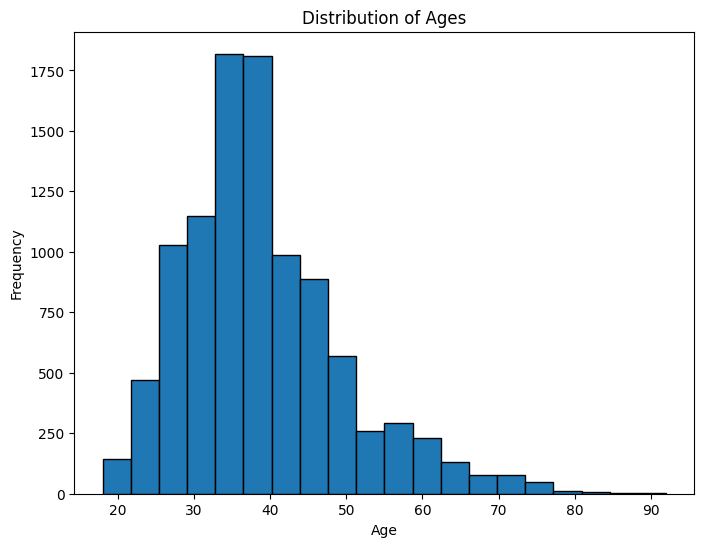

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')

plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

In [10]:
df1['Gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7552\4070406045.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Gender'].replace({'Female':1, 'Male':0}, inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7552\4070406045.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Gender'].re

In [11]:
new_df = pd.get_dummies(data=df1, columns=['Geography'])
new_df.replace({False:0, True:1}, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7552\1363534977.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df.replace({False:0, True:1}, inplace=True)


In [12]:
new_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42.0,2,0.00,1,1.0,1.0,101348.88,1,1,0,0
1,608,1,41.0,1,83807.86,1,0.0,1.0,112542.58,0,0,0,1
2,502,1,42.0,8,159660.80,3,1.0,0.0,113931.57,1,1,0,0
3,699,1,39.0,1,0.00,2,0.0,0.0,93826.63,0,1,0,0
5,645,0,44.0,8,113755.78,2,1.0,0.0,149756.71,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,1,36.0,7,0.00,1,0.0,1.0,42085.58,1,1,0,0
9998,772,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0
9999,772,0,42.0,3,75075.31,2,1.0,0.0,92888.52,1,0,1,0
10000,792,1,28.0,4,130142.79,1,1.0,0.0,38190.78,0,1,0,0


In [13]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

scaler = MinMaxScaler()

new_df[cols_to_scale] = scaler.fit_transform(new_df[cols_to_scale])
new_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0,1,0,0
5,0.590,0,0.351351,0.8,0.453394,0.333333,1.0,0.0,0.748797,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,0,1,0
9999,0.844,0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1,0,1,0
10000,0.884,1,0.135135,0.4,0.518708,0.000000,1.0,0.0,0.190914,0,1,0,0


In [14]:
x = new_df.drop('Exited', axis='columns')
y = new_df['Exited']

In [15]:
x = new_df.drop('Exited', axis='columns')
y = new_df['Exited']

In [16]:
y.value_counts()

Exited
0    7960
1    2038
Name: count, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

In [18]:
y_sm.value_counts()

Exited
1    7960
0    7960
Name: count, dtype: int64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [20]:
model = keras.Sequential([
        keras.layers.Dense(12, input_shape=(12,), activation='relu'),
        keras.layers.Dense(6, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)

weights = -1

model.fit(x_train, y_train, epochs=20)

print(model.evaluate(x_test, y_test))

y_preds = model.predict(x_test)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5947 - loss: 0.6711
Epoch 2/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6819 - loss: 0.6154
Epoch 3/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6811 - loss: 0.5961
Epoch 4/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6968 - loss: 0.5822
Epoch 5/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7094 - loss: 0.5697
Epoch 6/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7118 - loss: 0.5705
Epoch 7/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7161 - loss: 0.5679
Epoch 8/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7175 - loss: 0.5640
Epoch 9/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7266 - loss: 0.5572
Epoch 10/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7239 - loss: 0.5525
Epoch 11/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7218 - loss: 0.5554
Epoch 12/20
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [21]:
y_train.value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [22]:
y_test.value_counts()

Exited
0    1592
1    1592
Name: count, dtype: int64

In [23]:
y_preds[:5]

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [24]:
y_test[:5]

5882     0
1836     0
9693     1
14107    1
1674     0
Name: Exited, dtype: int64

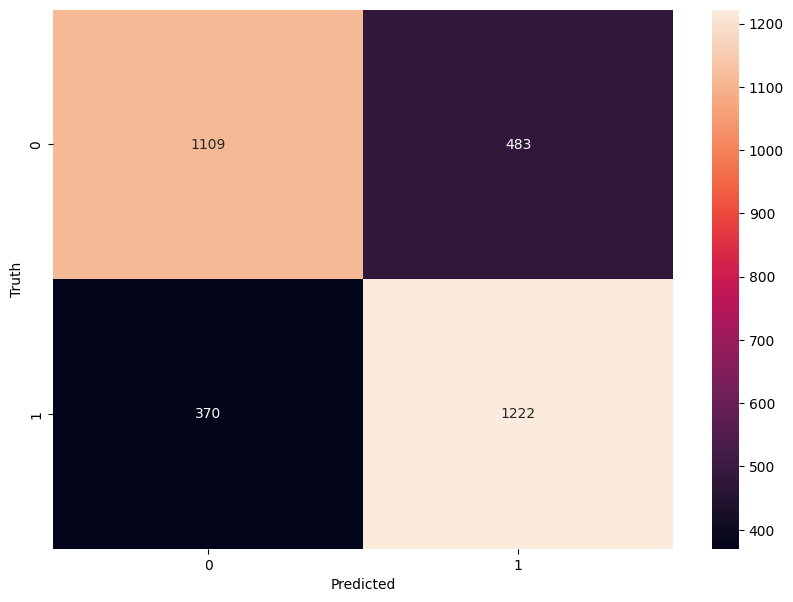

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_preds)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
